In [8]:
import pandas as pd
from io import StringIO
import re
import orjson

def read_submission_log(filename: str) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    with open(filename, 'r') as f:
        log_content = f.read()

    sandbox, market = log_content.split("Sandbox logs:")[1].split("Activities log:")
    market, trade_history = market.split("Trade History:")

    market = pd.read_csv(StringIO(market.strip()), sep=';')
    trade_history = orjson.loads(trade_history.strip())
    trade_history = pd.DataFrame(trade_history)
    sandbox = [orjson.loads(s) for s in re.findall(r'\{.*?\}', sandbox, re.DOTALL)]
    sandbox = pd.DataFrame(sandbox)
    return market, trade_history, sandbox

In [9]:
mk, th, logs = read_submission_log('round1-results.log')

In [10]:
mk[['bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3']] = mk[['bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3']].astype('Int64')
mk['profit_and_loss'] = 0

mk.to_csv('round8/prices_round_8_day_1.csv', sep=';', index=False)
th.to_csv('round8/trades_round_8_day_1_nn.csv', sep=';', index=False)

In [23]:
mk

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,NaN,NaN,NaN,NaN,1838,23,NaN,NaN,NaN,NaN,1836.0,0.000000
1,1,0,RAINFOREST_RESIN,9992,31,NaN,NaN,NaN,NaN,10008,31,NaN,NaN,NaN,NaN,10000.0,0.000000
2,1,0,KELP,2032,23,NaN,NaN,NaN,NaN,2035,23,NaN,NaN,NaN,NaN,2033.5,0.000000
3,1,100,KELP,2034,1,2033.0,2.0,2032.0,22.0,2035,22,NaN,NaN,NaN,NaN,2034.5,0.000000
4,1,100,SQUID_INK,1838,1,1837.0,2.0,1836.0,22.0,1839,22,NaN,NaN,NaN,NaN,1838.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,999800,KELP,2053,24,NaN,NaN,NaN,NaN,2055,8,2057.0,24.0,NaN,NaN,2054.0,5147.041016
29996,1,999800,SQUID_INK,1881,24,NaN,NaN,NaN,NaN,1883,8,1884.0,24.0,NaN,NaN,1882.0,4733.140625
29997,1,999900,KELP,2053,20,NaN,NaN,NaN,NaN,2057,20,NaN,NaN,NaN,NaN,2055.0,5147.000000
29998,1,999900,RAINFOREST_RESIN,9992,34,NaN,NaN,NaN,NaN,10008,34,NaN,NaN,NaN,NaN,10000.0,38345.000000


In [24]:
mk['swmid'] = (mk['bid_price_1'] * mk['ask_volume_1'] + mk['ask_price_1'] * mk['bid_volume_1']) / (mk['bid_volume_1'] + mk['ask_volume_1'])

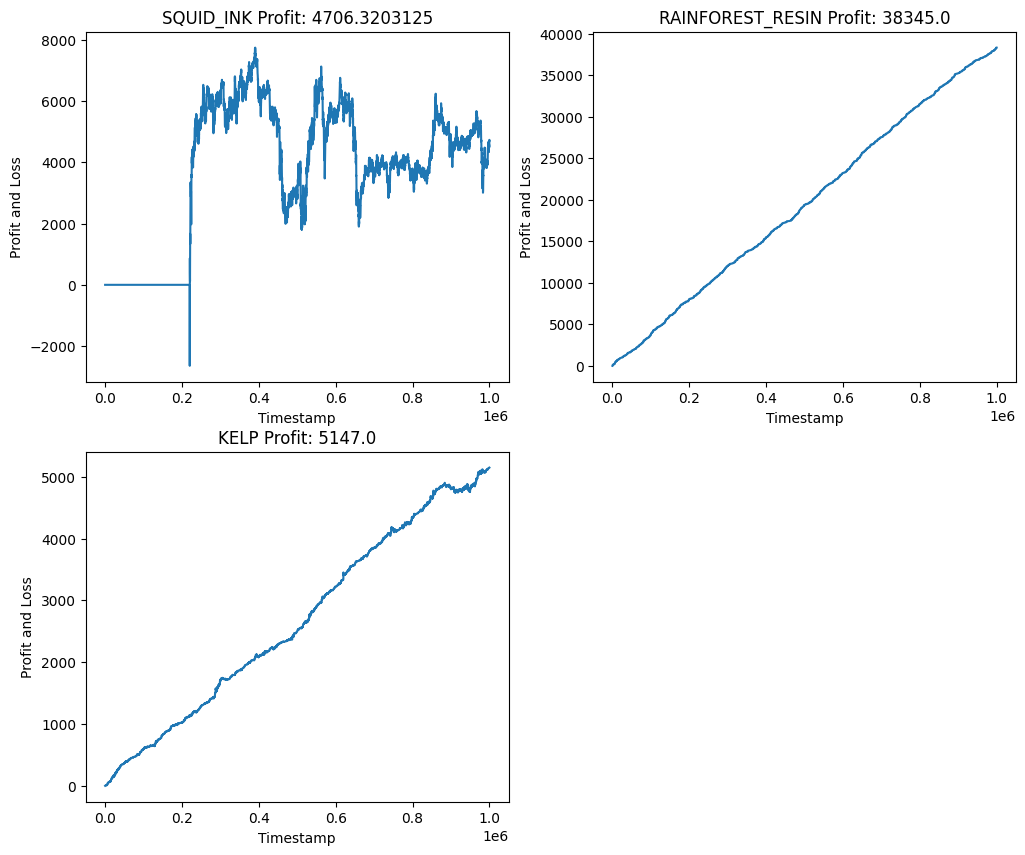

In [25]:
import matplotlib.pyplot as plt

ink = mk[mk['product'] == 'SQUID_INK'].reset_index(drop=True).copy()
resin = mk[mk['product'] == 'RAINFOREST_RESIN'].reset_index(drop=True).copy()
kelp = mk[mk['product'] == 'KELP'].reset_index(drop=True).copy()

plt.figure(figsize=(12, 10))

for i, df in enumerate([ink, resin, kelp]):
    plt.subplot(2, 2, i+1)
    plt.plot(df['timestamp'], df['profit_and_loss'], label=df['product'][0])
    plt.xlabel('Timestamp')
    plt.ylabel('Profit and Loss')
    plt.title(f'{df["product"][0]} Profit: {df["profit_and_loss"].iloc[-1]}')
plt.show()

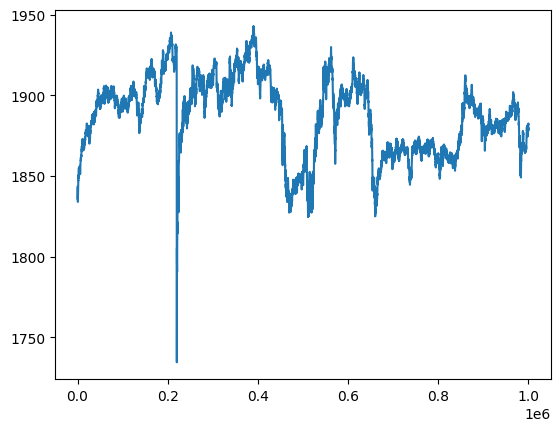

In [26]:
plt.plot(ink['timestamp'], ink['swmid'], label='SQUID_INK')

In [27]:
mk[['bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3']] = mk[['bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3']].astype('Int64')
mk.drop('swmid', inplace=True, axis=1)
mk['profit_and_loss'] = 0

In [30]:
mk

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,SQUID_INK,1834,23,<NA>,<NA>,<NA>,<NA>,1838,23,<NA>,<NA>,<NA>,<NA>,1836.0,0
1,1,0,RAINFOREST_RESIN,9992,31,<NA>,<NA>,<NA>,<NA>,10008,31,<NA>,<NA>,<NA>,<NA>,10000.0,0
2,1,0,KELP,2032,23,<NA>,<NA>,<NA>,<NA>,2035,23,<NA>,<NA>,<NA>,<NA>,2033.5,0
3,1,100,KELP,2034,1,2033,2,2032,22,2035,22,<NA>,<NA>,<NA>,<NA>,2034.5,0
4,1,100,SQUID_INK,1838,1,1837,2,1836,22,1839,22,<NA>,<NA>,<NA>,<NA>,1838.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,999800,KELP,2053,24,<NA>,<NA>,<NA>,<NA>,2055,8,2057,24,<NA>,<NA>,2054.0,0
29996,1,999800,SQUID_INK,1881,24,<NA>,<NA>,<NA>,<NA>,1883,8,1884,24,<NA>,<NA>,1882.0,0
29997,1,999900,KELP,2053,20,<NA>,<NA>,<NA>,<NA>,2057,20,<NA>,<NA>,<NA>,<NA>,2055.0,0
29998,1,999900,RAINFOREST_RESIN,9992,34,<NA>,<NA>,<NA>,<NA>,10008,34,<NA>,<NA>,<NA>,<NA>,10000.0,0


In [29]:
mk.to_csv('round8/prices_round_8_day_1.csv', sep=';')
th.to_csv('round8/trades_round_8_day_1_nn.csv', sep=';')